# Numba and Numpy fast calculations

In [1]:
import numba as nb
import numpy as np
from numba import jit, njit
import time

**Creating a function for displaying the results of each comparation**

In [111]:
def display_res(title, xlabel, ylabel, values, names):
    _values = values
    width = 0.4 # set the width of the bar

    fig, ax = plt.subplots(figsize=(13,5)) # create a figure and add a bar chart
    bars = ax.bar(np.arange(len(values)), _values, width)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(np.arange(len(names)))
    ax.set_xticklabels(names)
    ax.set_ylim(0, max(values) + max(values)/10)

    for bar in bars:
        h = bar.get_height()
        ax.annotate(h, xy=(bar.get_x() + bar.get_width()/2, h), xytext=(0, 3), 
                    textcoords='offset points', ha='center', va='bottom')

    fig.tight_layout()
    plt.show()

## njit, jit Decorators

In [ ]:
xs = np.arange(10)
ys = np.arange(10,20, 1)

In [21]:
def return_sum(_xs, _ys):
    return np.add(_xs,_ys)

start_norm = time.time()
zs = return_sum(xs,ys)
end_norm = time.time()
total_norm = end_norm-start_norm
print("Normal operation took: {} seconds".format(total_norm))

Normal operation took: 0.00016117095947265625 seconds


In [30]:
@jit(nopython=True)
def return_sum(_xs, _ys):
    return np.add(_xs, _ys)

start_jit = time.time()
zs = return_sum(xs,ys)
end_jit = time.time()
print("time took before compilation jit-no-python: {}".format(end_jit - start_jit))

start_jit = time.time()
zs = return_sum(xs,ys)
end_jit = time.time()
total_jit_np = end_jit - start_jit
print("time took after compilation jit-no-python: {}".format(total_jit_np))

time took before compilation jit-no-python: 0.14188790321350098
time took after compilation jit-no-python: 5.91278076171875e-05


In [32]:
@jit
def return_sum(_xs, _ys):
    return np.add(_xs, _ys)

start_jit1 = time.time()
zs = return_sum(xs,ys)
end_jit1 = time.time()
print("time took before compilation jit: {} seconds".format(end_jit1 - start_jit1))

start_jit = time.time()
zs = return_sum(xs,ys)
end_jit = time.time()
total_jit = end_jit - start_jit
print("time took after compilation jit: {} seconds".format(total_jit))

time took before compilation jit: 0.1394178867340088 seconds
time took after compilation jit: 6.794929504394531e-05 seconds


In [43]:
@jit(nopython=True, parallel=True)
def return_sum(_xs, _ys):
    return np.add(_xs, _ys)

start_jit_parallel = time.time()
zs = return_sum(xs,ys)
end_jit_parallel = time.time()
print("time took before compilation jit-parallel-np: {} seconds".format(end_jit_parallel - start_jit_parallel))

start_jit_parallel_np = time.time()
zs = return_sum(xs,ys)
end_jit_parallel_np = time.time()
total_jit_parallel_np = end_jit_parallel_np - start_jit_parallel_np
print("time took after compilation jit-parallel-np: {} seconds".format(total_jit_parallel_np))

time took before compilation jit-parallel-np: 0.3147318363189697 seconds
time took after compilation jit-parallel-np: 0.0003829002380371094 seconds


In [24]:
@njit
def return_sum(_xs, _ys):
    return np.add(_xs, _ys)

start_njit = time.time()
zs = return_sum(xs,ys)
end_njit = time.time()
print("time took before compilation njit: {} seconds".format(end_njit - start_njit))

start_njit = time.time()
zs = return_sum(xs,ys)
end_njit = time.time()
total_njit = end_njit - start_njit
print("time took after compilation njit: {} seconds".format(total_njit))

time took before compilation njit: 0.13097023963928223 seconds
time took after compilation njit: 5.602836608886719e-05 seconds


In [19]:
import matplotlib.pyplot as plt

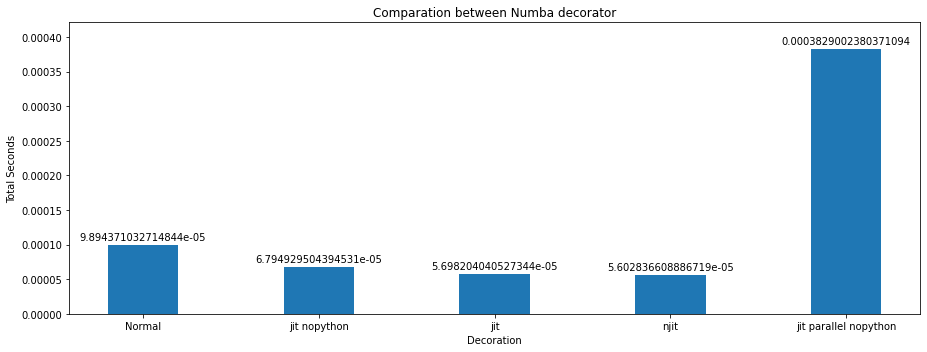

In [168]:
totals = [total_norm, total_jit, total_jit1, total_njit, total_jit_parallel_np]
names = ["Normal", "jit nopython", "jit", "njit", "jit parallel nopython"]
display_res("Comparation between Numba decorator",
            "Decoration", 
            "Total Seconds", totals, names)

## vectorize, guvectorize Decorators

### vectorize
Works with one element at a time, the decorator create the iteration loop

In [53]:
a = np.arange(5)
b = np.arange(5,10, 1)

**Vectorizing**

In [61]:
from numba import vectorize

@vectorize
def sumup(x, y):
    return np.add(x, y)

start_vec = time.time()
sumup(a, b)
end_vec = time.time()
total_vec = end_vec - start_vec

start_vec = time.time()
sumup(a, b)
end_vec = time.time()
total_vec = end_vec - start_vec
print("vectorize took: {}".format(total_vec))

vectorize took: 7.200241088867188e-05


**Vectorizing with types specified**

In [74]:
from numba import float32

@vectorize([float32(float32, float32)])
def sumup(x, y):
    return np.add(x, y)

_a = _b = np.arange(5, dtype=np.float32)
start_vec_specs = time.time()
s = sumup(_a, _b)
end_vec_specs = time.time()
total_vec_specs = end_vec_specs - start_vec_specs

start_vec_specs = time.time()
s = sumup(_a, _b)
end_vec_specs = time.time()
total_vec_specs = end_vec_specs - start_vec_specs
print("vectorize_specs took: {}".format(total_vec_specs))

vectorize_specs took: 6.389617919921875e-05


**Vectorizing with types specified and Parallel**

In [76]:
from numba import float32

@vectorize([float32(float32, float32)],target="parallel")
def sumup(x, y):
    return np.add(x, y)

_a = _b = np.arange(5, dtype=np.float32)
start_vec_prl = time.time()
s = sumup(_a, _b)
end_vec_prl = time.time()
total_vec_prl = end_vec_prl - start_vec_prl

start_vec_prl = time.time()
s = sumup(_a, _b)
end_vec_prl = time.time()
total_vec_prl = end_vec_prl - start_vec_prl
print("vectorize_parallel took: {}".format(total_vec_prl))

vectorize_parallel took: 0.00023293495178222656


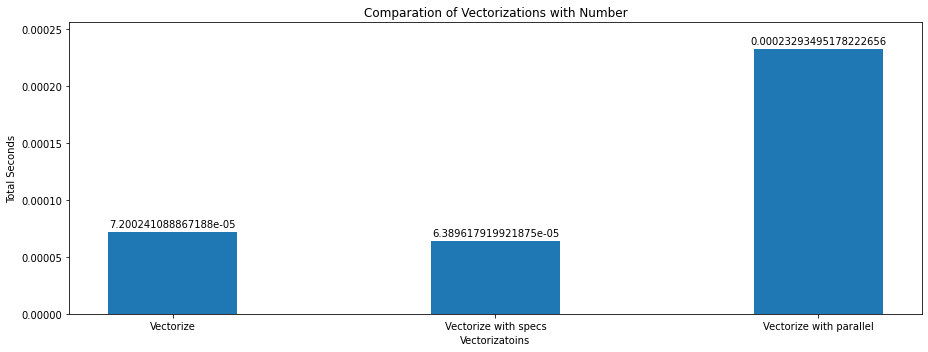

In [169]:
totals_vecs = [total_vec, total_vec_specs, total_vec_prl]
names_vecs = ['Vectorize', 'Vectorize with specs', 'Vectorize with parallel']
display_res(title="Comparation of Vectorizations with Number",
            xlabel="Vectorizatoins", 
            ylabel="Total Seconds", values=totals_vecs, names=names_vecs)

### guvectorize

This decorator can work with multiple elements

Specifying that we are getting an array, scalar and another array, and adding the scalar for the result:

In [171]:
from numba import guvectorize, int64
@guvectorize([(int64[:], int64, int64[:])], '(n),()->(n)')
def adding(x,scalar, y):
    for i in range(len(x)):
        y[i] = x[i] + scalar

In [172]:
x = np.arange(5, dtype=np.int64)
y = np.empty(5, dtype=np.int64)
scalar = 1
start_guvec = time.time()
adding(x,scalar, y)
end_guvec = time.time()
total_guvec = end_guvec - start_guvec
print("guvectorize took {} seconds".format(total_guvec))

guvectorize took 9.608268737792969e-05 seconds


In [173]:
def adding(x,scalar, y):
    for i in range(len(x)):
        y[i] = x[i] + scalar
        
start_gunorm = time.time()
adding(x,scalar, y)
end_gunorm = time.time()
total_gunorm = end_gunorm - start_gunorm
print("normal calculation took {} seconds".format(total_gunorm))

normal calculation took 8.702278137207031e-05 seconds


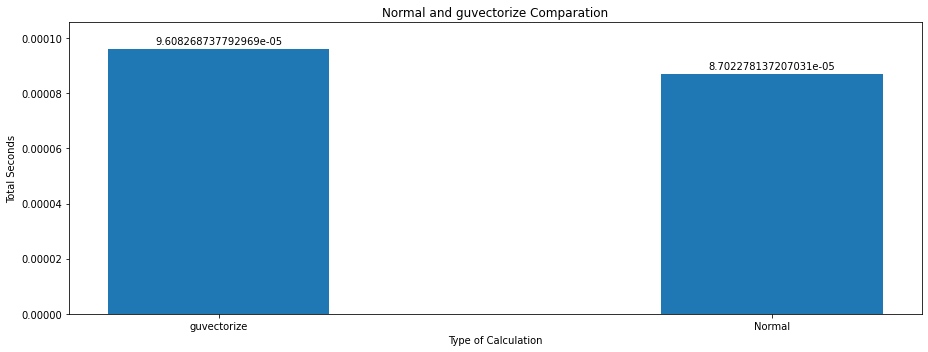

In [174]:
totals_guvec = [total_guvec, total_gunorm]
names = ['guvectorize', 'Normal']
display_res(title="Normal and guvectorize Comparation", xlabel="Type of Calculation", ylabel="Total Seconds", 
            values = totals_guvec, names=names)

In [175]:
@guvectorize(["int64[:], int64[:, :], int64[:, :]"], '(n), (r, c) -> (r, c)')
def adding(x,y, res):
    r, c = y.shape
    for i in range(r):
        for j in range(c):
            res[i][j] = y[i][j] + x[i*j%len(x)]

In [176]:
x = np.arange(5)
y = np.arange(12).reshape((3,4))
res = np.empty(12).reshape((3,4))
start_guvec = time.time()
adding(x,y,res)
end_guvec = time.time()
total_guvec = end_guvec - start_guvec
print("guvectorize over multi-dim arrays took: {}".format(total_guvec))

guvectorize over multi-dim arrays took: 8.225440979003906e-05


In [177]:
def adding(x,y, res):
    r, c = y.shape
    for i in range(r):
        for j in range(c):
            res[i][j] = y[i][j] + x[i*j%len(x)]
            
start_norm = time.time()
adding(x,y,res)
end_norm = time.time()
total_norm = end_norm - start_norm
print("normal operations over multi-dim arrays took: {}".format(total_norm))

normal operations over multi-dim arrays took: 0.00010180473327636719


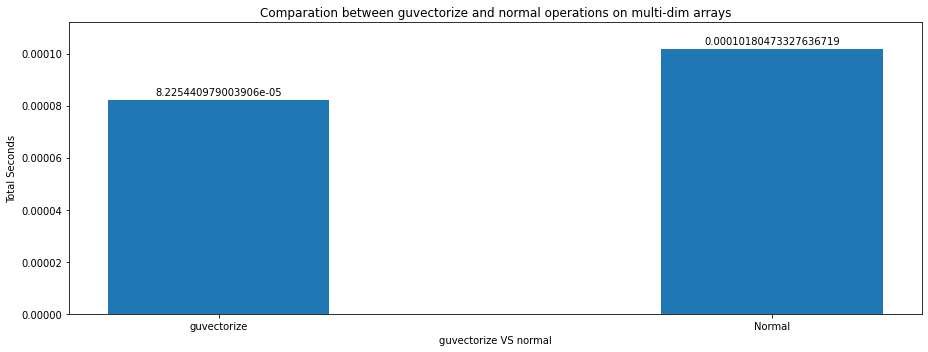

In [178]:
totals_guvec_norm = [total_guvec, total_norm]
names_guvec_norm = ["guvectorize", "Normal"]
display_res(title="Comparation between guvectorize and normal operations on multi-dim arrays", xlabel="guvectorize VS normal", ylabel="Total Seconds", values=totals_guvec_norm, names=names_guvec_norm)